In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [59]:
def plot_classifier(model, features, labels):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    h = .02  # step size in the mesh
    X = features#.values[:, :2] # converting dataframe into numpy array
    y = labels#.values
    
#     map_dict = {'setosa':0, 'versicolor':1, 'virginica':2}
#     y = np.array(list(map(lambda a: map_dict[a],list(y))))

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    model.fit(X,y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("{} classification".format(model))

# plot_classifier(KNeighborsClassifier(5), X, y) , x = feature vector and y=labels

In [11]:
from sklearn.datasets import load_iris, load_breast_cancer

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
iris = load_iris()

In [13]:
type(iris)

sklearn.datasets.base.Bunch

In [14]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [25]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X = iris_df['']
y = iris_df['tar']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2)

In [31]:
X_train.shape

(120, 4)

In [32]:
svm = SVC().fit(X_train, y_train)

In [34]:
X_test

array([[ 6.1,  2.8,  4. ,  1.3],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 5.8,  2.7,  4.1,  1. ],
       [ 5.5,  2.4,  3.7,  1. ],
       [ 6.4,  2.9,  4.3,  1.3],
       [ 6.7,  3.1,  5.6,  2.4],
       [ 6.7,  2.5,  5.8,  1.8],
       [ 5.1,  3.4,  1.5,  0.2],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 6.7,  3.3,  5.7,  2.1],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 6.2,  2.2,  4.5,  1.5],
       [ 6.8,  3.2,  5.9,  2.3],
       [ 7.2,  3.2,  6. ,  1.8],
       [ 6.2,  2.9,  4.3,  1.3],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 4.8,  3. ,  1.4,  0.3],
       [ 6.3,  3.3,  6. ,  2.5],
       [ 7.7,  2.6,  6.9,  2.3],
       [ 5. ,  2.3,  3.3,  1. ],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 6. ,  2.7,  5.1,  1.6],
       [ 6.4,  2.8,  5.6,  2.2],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5. ,  3.2,  1.2,  0.2]])

In [33]:
y_pred = svm.predict(X_test)

array([1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 0])

In [35]:
svm.score(X_test, y_test)

0.96666666666666667

In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [37]:
mapper = {0:'setosa', 1:'versicolor', 2:'virginica'}

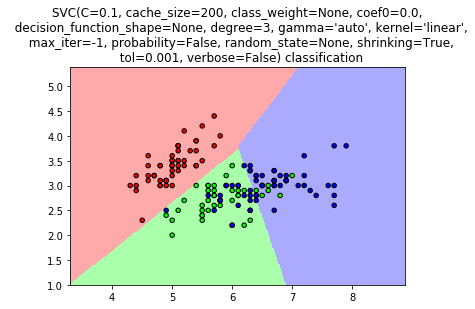

In [41]:
plot_classifier(SVC(kernel='linear',C = 0000000.1), iris_df.drop('target', axis=1), iris_df.target)

In [44]:
from sklearn.datasets import make_blobs

In [85]:
X_D2, y_D2 = make_blobs(n_samples = 150, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

In [65]:
X_D2.shape

(100, 2)

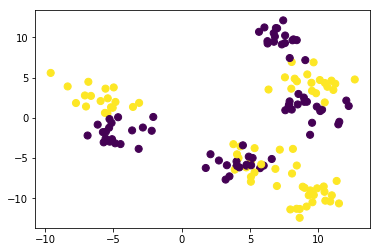

In [86]:
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)

In [ ]:
c = np.linspace()
train_test_split()

0.7
0.713333333333
0.753333333333


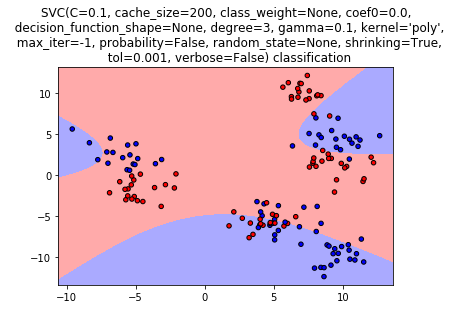

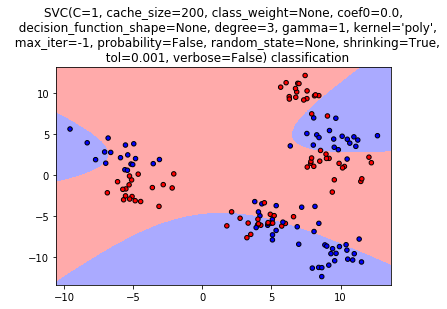

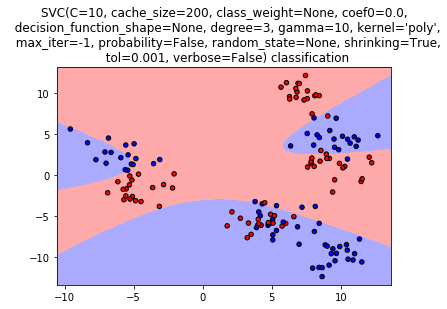

In [88]:
for c, gamma in zip([0.1,1,10],[0.1,1,10]):
    svm = SVC(gamma=gamma, C= c, kernel='poly')
    plot_classifier(svm,X_D2, y_D2)
    print(svm.score(X_D2, y_D2))

In [92]:
svm.

ValueError: coef_ is only available when using a linear kernel

In [95]:
clf = SVC(kernel='linear').fit(iris.data, iris.target)

In [100]:
clf.

array([ 1.,  1.,  1.])

In [101]:
cancer = load_breast_cancer()

In [102]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [104]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [112]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    test_size=0.2,
                                                    random_state =0)

In [110]:
svm = SVC().fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.984615384615
0.973684210526


# Scaling the features

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaled_data = StandardScaler().fit_transform(cancer.data)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, 
                                                    cancer.target,
                                                    test_size=0.2,
                                                    random_state =0)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
clf = KNeighborsClassifier().fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.978021978022
0.956140350877


# Reading Image

In [117]:
img = plt.imread('images/c.png')

In [120]:
img.reshape(-1,403098*4).shape

(403098, 4)

# Naive bayes classifier

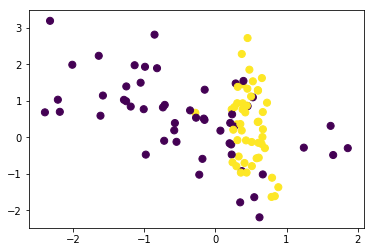

In [122]:
from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)


In [123]:
from sklearn.naive_bayes import GaussianNB

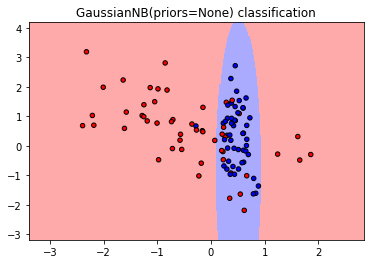

In [124]:
plot_classifier(GaussianNB(),X_C2, y_C2)